In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import skimage.io as io

In [2]:
########################################
######MODIFICAR IMAGEN PARA COMPARAR ###
########################################
def spectrumImage(path):
    #images_path = './results' 
    #image_real = 'real_samples.png'
    img = io.imread(path)
    #plt.imshow(img)
    
    img = img.astype(np.float32)
    img = img/255

    for i in range(3):
        image = img[:,:,i]
        #Hacer 2D Fourier Trasnsformation
        fftImage= np.fft.fft2(image)
        #Computar el espectro del logaritmo
        fftImage = np.log(np.abs(fftImage)+1e-3)

        #Calcula los percentiles para unos valores
        fft_min = np.percentile(fftImage,5)
        fft_max = np.percentile(fftImage,95)

        fftImage = (fftImage - fft_min)/(fft_max - fft_min)
        fftImage = (fftImage-0.5)*2

        #Normaliza los valores
        fftImage[fftImage<-1] = -1
        fftImage[fftImage>1] = 1
        
    plt.imshow(fftImage)

In [3]:
#########################################
######FUNCION PARA COMPARAR##############
#########################################
def comparaImagenes(path1, path2):
    img1 = spectrumImage(path1)
    img2 = spectrumImage(path2)
    diferencia = cv2.subtract(img1,img2) 
    print(diferencia)
    
    if not np.any(diferencia):
        print("Las imágenes son iguales") 
    else:
        print("Las imágenes son iguales")

None
Las imágenes son iguales


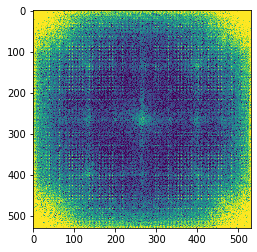

In [4]:
comparaImagenes('real_samples.png', 'fake_samples_epoch_013.png')

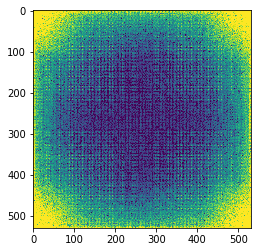

In [5]:
imgReal = spectrumImage('real_samples.png')

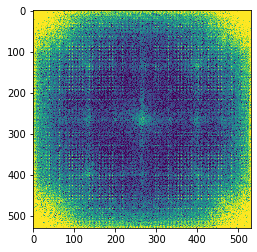

In [6]:
imgFake = spectrumImage('fake_samples_epoch_013.png')